This chapter is all about how to get our data in a form that we need in order to actually train the models we learned about in the last chapter, as well as others.

The key areas of concern during preprocessing are:

* Dealing with missing data
* Getting categorical data in a form tht is acceptable to a machine learning algorithm
* Selecting relevant features for model construction

Getting rid of missing data is important due to the unpredictably of computational techniques when it exists within your data set. Let's construct a simple dataframe using the pandas module from a **CSV** file.

In [1]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
              1.0,2.0,3.0,4.0
              5.0,6.0,,8.0
              10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


As evidenced from **df**, we have *NaN* values in our data. We can use simple methodology to find out how many.

In [2]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

This tells us that Columns C and D both have a single *NaN* value.

Now, how do we remove these? There are several methods we can employ to go about starting the process. Let's take a look at some.

In [3]:
df.dropna() #Removes every row with a NaN value

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [4]:
df.dropna(axis=1) #Removes any feature (column) with at least one NaN value

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [5]:
df.dropna(how='all') #Only removes rows where every value is NaN

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [6]:
df.dropna(thresh=4) #Remove rows with less than 4 NaN values (seems useless)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
df.dropna(subset=['C']) #Remove rows where column C has a NaN value.

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


Although removing the data is important sometimes, often it will lead us to lose too much valuable data. Thus, we need to look into another common technique for dealing with missing data: interpolation.

One of the most common methods of interpolation is **mean imputation** in which we simply replace the missing value with the mean value of the feature.

An easy way to do this is the **Imputer** class within scikit-learn.

In [8]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

The **Imputer** class belongs to the *transformers* in scikit-learn. The models we saw in Ch. 3 belong to the *estimators*. The API is very similar in concept. 

* The *fit* methods learns parameters from the dataset.
* The *transform* methods manipulate the data based on the logic inherent to the transformer/estimator, and the parameters it learned from *fit*
* Estimators also have a *predict* method to make predictions about new data

**The following section will be of particular importance with the problem of patient Show/No Show as it deals with categorical data.**

Many real-world datasets contain *categorical* data, i.e. data that is not presented in numerical form. This data requires further distinction:
* **ordinal**: categorical data that has some obvious progression of order (t-shirt size, temperature descriptions)
* **nominal**: categorical data with no such concept of order (t-shirt color, climate zone)

In [9]:
import pandas as pd

df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']
])
df.columns = ['color', 'size', 'price', 'classlabel']

df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In our dataframe **df**, color is a nominal feature, size is ordinal, price is numeric, and classlabel defines the samples in a way that allows us to use supervised learning.

For interpretation by a machine learning algorithm, we have to transform our categorical data into numerical data. For our ordinal feature *size*, we define a mapping function that transforms the data into a numerical form that conveys the order of the feature.

In [10]:
size_mapping = {
                'XL' : 3,
                'L' : 2,
                'M' : 1
                }

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


To go back to our string-valued form of *size*, we can define an inverse mapper as follows.

In [11]:
inv_size_mapping = {v : k for k, v in size_mapping.items()}

df['size'] = df['size'].map(inv_size_mapping)
print(df)

df['size'] = df['size'].map(size_mapping)
df

   color size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1


,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


While most machine learning libraries convert class labels to integers internally, it's considered good practice to do so in preprocessing. 

In [12]:
import numpy as np

class_mapping = {label:idx for idx, label in
                 enumerate(np.unique(df['classlabel']))}

class_mapping

{'class1': 0, 'class2': 1}

In [13]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [14]:
inv_class_mapping = {v : k for k, v in class_mapping.items()}

df['classlabel'] = df['classlabel'].map(inv_class_mapping)
print(df)

df['classlabel'] = df['classlabel'].map(class_mapping)
df

   color  size  price classlabel
0  green     1   10.1     class1
1    red     2   13.5     class2
2   blue     3   15.3     class1


,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


We also demonstrated the inverse process for the sake of completion. However, there's a convenient class in sklearn called **LabelEncoder** that accomplishes this process for us.

In [15]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'])
y

array([0, 1, 0], dtype=int64)

*fit_transfom* is a neat little shortcut for calling *fit* and *transform* separately. **LabelEncoder** also provides us with the inverse transformation process.

In [16]:
orig = class_le.inverse_transform(y) #this is not working for some reason

In [17]:
orig

array([0, 1, 0], dtype=int64)

We used a handwritten method to encode our ordinal data because we had no choice, but it's tempting to think we code use **LabelEncoder** to encode nominal features.

In [18]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

So what's the problem here? Yeah, we've encoded our colors into separate numerical values, but **they now look like ordinal values to a machine learning algorithm**. It'll think that blue I *smaller* than green which is *smaller* than red. This may not always spell doom, but is not optimal.

To get around this, we can use a technique called **one-hot encoding**. We create **dummy features** for each unique value in a feature and assign a binary value to it. Thus, a blue shirt would look like {*blue*=1,*green*=0,*red*=0}. Lucky for us, sklearn has our back again.

In [19]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

A more convenient method is *get_dummies* in pandas.

In [20]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


To practice preprocessing and learn about splitting our data into training and test data sets, let's practice on the **Wine** dataset, available at https://archive.ics.uci.edu/ml/datasets/Wine.

In [21]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                       header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic Acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))

df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


A convenient method of partitioning this data is the one we saw last chapter: use the *model_selection* submodule within scikit-learn.

*Note: Raschka uses the cross_validation module for this, but the DeprecationWarning that pops up when you try that suggests using model_selection instead. I did cross_validation to show this.

In [22]:
# from sklearn.cross_validation import train_test_split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

An oft overlooked step in preprocessing is that of *feature scaling*. The only models we've covered that don't suffer from using nonscaled data are the decision tree and random forest - everything else needs scaling. Let's look at **min-mix scaling**, defined mathmatically below and implemented in scikit-learn.

$$x_{norm}^{(i)} = \frac{x^{(i)} - x_{min}}{x_{max}-x_{min}}$$

In [25]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

Most of the time however, *standardization* is more useful because it makes learning weights for LR and SVM easier and is less subject to outliers. It's defined below mathematically.

$$x_{std}^{(i)} = \frac{x^{(i)} - \mu_{x}}{\sigma_{x}} \textit{where $\mu_{x}$ is the feature mean and $\sigma_{x}$ is the standard deviation}$$

In [26]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

Selecting meaningful features within the training set is important for creating a model that is not overfit. We briefly discussed this is the previous chapter when we covered regularization, specifically L2 regularization. Another method is **L1 regularization**:

$$L1: ||\textbf{w}||_{1}=\sum_{j=1}^{m}|w_{j}|$$

In contrast to L2, *L1 regularization* yields sparse feature vectors. This encourages *sparsity* on the part of the model. Raschka gives a decent geometric explanation and recommends section 3.4 of *The Elements of Statistical Learning, Trevor Hastie, Robert Tibshirani, and Jerome Friedman, Springer*.

Due to the sparse nature of L1 regualrized sets, it can be thought of as a method of **feature selection**. It's also implemented into sklearn via a penalty='l1' parameter in the model call.

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)

print('Training Accuracy: ', lr.score(X_train_std, y_train))
print('Test Accuracy: ', lr.score(X_test_std, y_test))

Training Accuracy:  0.983870967742
Test Accuracy:  0.981481481481


~98% accuracy in both tests indicates that we probably don't have overfitting going on. We can look at the intercepts of our **One-vs-Rest** approach (see Raschka p 116) as follows:

In [28]:
lr.intercept_

array([-0.38379708, -0.15812941, -0.70043068])

Now, we can get a view of the sparsity of our feature weight matrix:

In [29]:
lr.coef_

array([[ 0.28026272,  0.        ,  0.        , -0.028013  ,  0.        ,
         0.        ,  0.7100727 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23619625],
       [-0.64378266, -0.0689325 , -0.05717645,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.9272062 ,
         0.05983731,  0.        , -0.37098115],
       [ 0.        ,  0.0615258 ,  0.        ,  0.        ,  0.        ,
         0.        , -0.63577509,  0.        ,  0.        ,  0.49795306,
        -0.35856174, -0.57131439,  0.        ]])

Remembering how our net input is calculated:

$$z = w_{1}x_{1} + ... + w_{m}x_{m} = \sum_{j=0}^{m} x_{j}w_{j} = \textbf{w}^{T}\textbf{x}$$

if our weight vector is sparse, each class will only have a few nonzero entities predicting it.

Let's plot how our weights change with the strength of our regularization parameter.

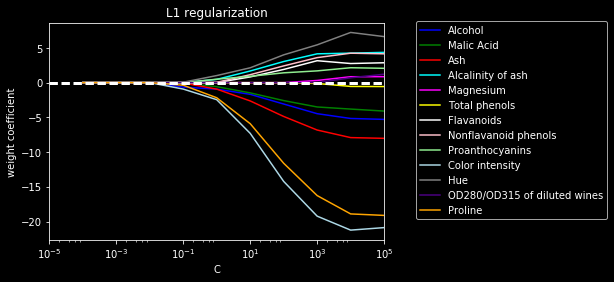

In [30]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow','white',
          'pink', 'lightgreen','lightblue',
          'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1',
                            C=10**c,
                            random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot (params, weights[:, column],
              label=df_wine.columns[column+1],
              color=color)
    
plt.axhline(0, color='white', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.title('L1 regularization')
plt.show()

Because $C=\frac{1}{\lambda}$, we see that strengthening of the regularization parameter forces weight coefficients to 0.

This is merely one way to reduce complexity and minimize the chance of overfitting. One can also undergo a process known as **dimensionality reduction** by feature selection.

This process is further subdivided into *feature selection* and *feature extraction*. The former involves choosing a subset of our original feature set, while the latter constructs a new feature subspace. This chapter will only cover the former.

Sequential feature selection algorithms reduce a *d-dimensional* feature associated with our original dataset to a *k-dimensional* space where $k < d$.

We can implement one such greedy algorithm called **Sequential Backward Selection (SBS)**. It'll remove as many features as we tell it to, and we'll define a criterion function to minimize that informs the algorithm what features to take away.

We will eliminate the feature at each stage that causes the least performance lost.

Amazingly, this algorithm is not implemented in scikit-learn yet. We'll do it from scratch below.

In [31]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features,
                 scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
            
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

Now we'll run this algorithm alongside a KNN classifier.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

Now we'll plot the classification accuracy of the KNN classifier.

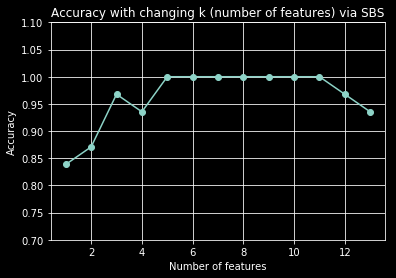

In [33]:
k_feat = [len(k) for k in sbs.subsets_]
plt.style.use('dark_background')

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.title('Accuracy with changing k (number of features) via SBS')
plt.show()

When the model had 5-11 features, it had 100% accuracy! What were those features?

In [34]:
k5 = list(sbs.subsets_[8])
print(k5)
print(df_wine.columns[1:][k5])

[0, 1, 3, 10, 12]
Index(['Alcohol', 'Malic Acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


Let's see how this classifier performs on our test data.

In [35]:
knn.fit(X_train_std, y_train)
print('Training accuracy: ', knn.score(X_train_std, y_train))
print('Testing accuracy: ', knn.score(X_test_std, y_test))

Training accuracy:  0.983870967742
Testing accuracy:  0.944444444444


In [36]:
knn.fit(X_train_std[:,k5], y_train)
print('Training accuracy: ', knn.score(X_train_std[:, k5], y_train))
print('Testing accuracy: ', knn.score(X_test_std[:, k5], y_test))

Training accuracy:  0.959677419355
Testing accuracy:  0.925925925926


Note: In the book he gets testing accuracy of ~96% from looking at the five indices gleaned from his SBS algorithm. I have tried fruitlessly to find an issue with the way I've written the code from his book and must continue forward with this issue still in place.

Hopefully I'll find the problem eventually.

*Random forests*, the ensemble classifier from the last chapter, also has great ways of selecting relevant features. The *feature_importance* attribute does it for us. We'll train an RF classifier to see this in action.

In [43]:
%%time
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                               n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]],
                               importances[indices[f]]))

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic Acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916
Wall time: 15.2 s


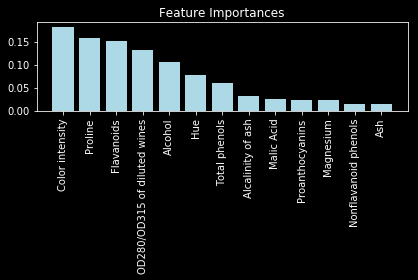

In [44]:
plt.style.use('dark_background')
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        color='lightblue',
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Finally, we can use the transform method of sckit-learn to select out the features that the random forest says are important.

In [45]:
X_selected = forest.transform(X_train, threshold=0.15)
X_selected.shape

C:\Users\Tyler Hughes\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(124, 3)

Looks like that method is deprecated, will have to learn new methods.

In this chapter, Raschka demonstrated several ways to select out features in your data to better train models. These included:

* L1 Regularization to encourage sparsity of weight matrices
* Sequential Backward Selection (did not work as intended, see other options in sklearn module)
* Random forest classifier feature importance measurements

Also, preprocessing techniques and feature scaling techniques were discussed:

* Missing data imputing
* Dummy variables and one-hot encoding
* Min-max scaling and standardization

The next chapter will delve deeper into **dimensionality reduction**.
